# 假设检验
对于回归预测结果，通常会有平均绝对误差（MAE)，均方误差（MSE），平均绝对百分比误差（MAPE）等 3 个指标进行评价。其中，MAE 和 MSE 在线性回归和多项式回归的实验中已经有所介绍，下面重新回顾并补充 MAPE 的计算公式。

平均绝对误差（MAE）就是绝对误差的平均值，它的计算公式如下：
$$
MAE(y,\hat{y}) = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

均方误差（MSE）表示误差的平方的期望值，它的计算公式如下：
$$
MSE(y,\hat{y}) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

平均绝对百分比误差（MAPE）。MAPE 是 MAD 的变形，它是一个百分比值，因此比其他统计量更容易理解。例如，如果 MAPE 为$5$，则表示预测结果较真实结果平均偏离$5$。MAPE 的计算公式如下:
$$
MAPE(y,\hat{y}) = \frac{1}{n} \sum_{i=1}^{n} \frac{|y_i - \hat{y}_i|}{|y_i|}*100
$$

对于以上三个公式，$y_i$表示真实值，$\hat{y}_i$表示预测值。三个评估值越小，说明预测模型有更好的精确度。

其中，scikit-learn 提供了 MAE 和 MSE 计算方法如下：
```python
sklearn.metrics.mean_absolute_error(y_true, y_pred)  # MAE 计算
sklearn.metrics.mean_squared_error(y_true, y_pred)  # MSE 计算
```

而关于 MAPE 的计算方法，虽然 scikit-learn 未直接提供，但我们已经学会了如何用公式实现。

上面的三个公式，实际上往往仅能用于评价模型的相对优劣，比如多项式回归比线性回归应用于同一组数据结果更好。但如果我们要评价某模型是否真能够很好地解释样本数据，就需要通过一系列的 假设检验 手段来完成了。


# 拟合优度检验
当我们使用回归分析拟合数据时，实际上是通过样本所估计的参数来代替了总体的真实参数。尽管从统计性质上可知，当进行足够多的重复抽样操作后，参数估计值的期望就等于其总体的真实参数。但实际上，单次抽样过程中，参数的估计值和真实值可能存在差异。

那么，单次抽样后，参数的估计值与真实值差异是否显著，就需要进行统计检验。实际上，在一元线性回归模型中，一般需要：拟合优度检验、变量的显著性检验及参数的区间估计。在多元线性回归模型中，往往会有：拟合优度检验、变量的显著性检验（T 检验）、方程的显著性检验（F 检验）及参数的置信区间。其中，一元线性回归中的 T 检验和 F 检验一致。

一元线性回归的拟合优度检验，指的是对样本回归拟合直线与样本观测值之间拟合程度进行检验。我们一般会使用判定系数$R^2$作为度量拟合优度的指标。

假设我们有一组样本观测值$(x_i,y_i)$，其得到线性回归拟合直线为：
$$\hat{y}_i = wx_i + b$$

此时，如果样本观测值的均值为：$$\bar{y} = \frac{1}{n}\sum_{i=1}^{n}y_i$$
我们定义第$i$个观测值与样本观测值的均值的$"离差"$为：$$Y_i = y_i - \bar{y}$$
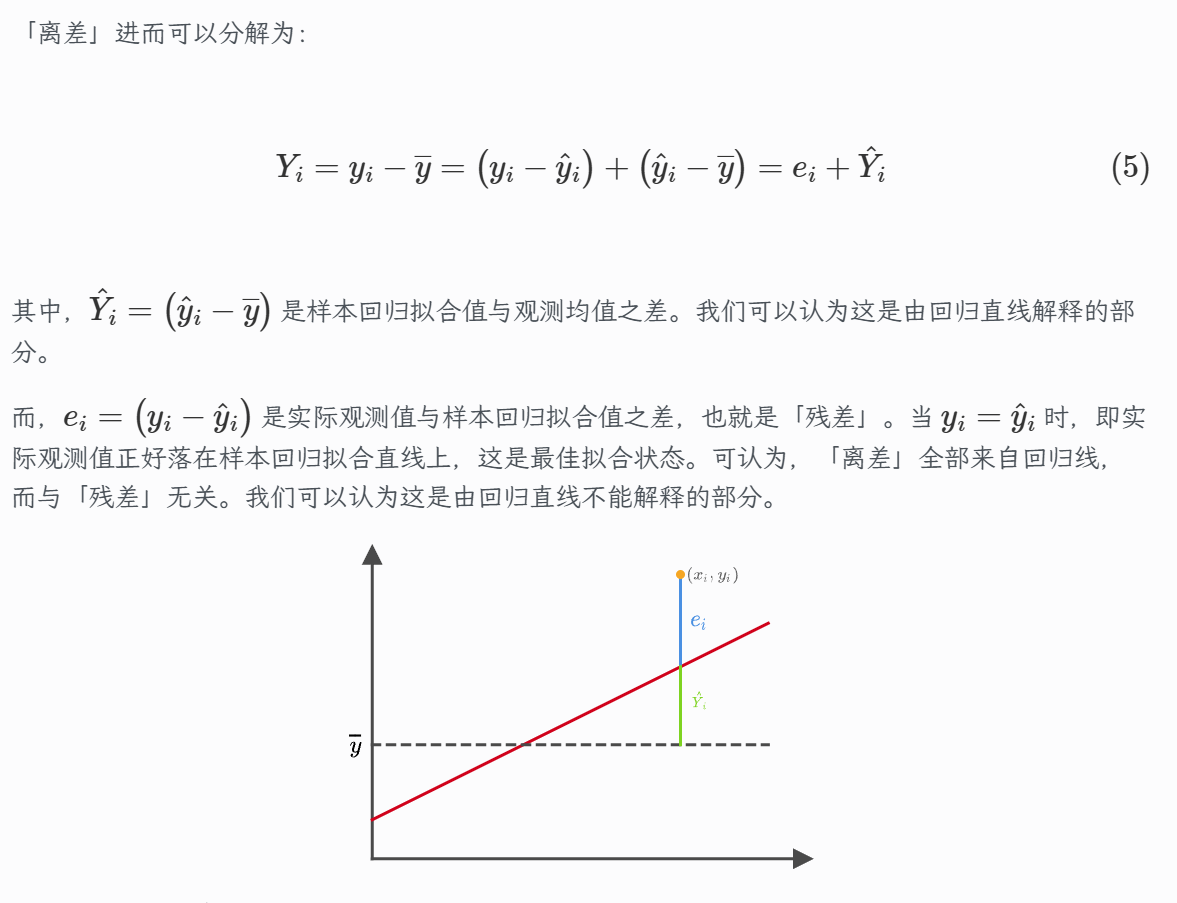

我们记：
$$TSS =\sum_{i=1}^n Y_i^2 =  \sum_{i=1}^n (y_i - \bar{y})^2$$
$$ESS = \sum_{i=1}^n (y_i - \hat{y}_i)^2$$
$$RSS = \sum_{i=1}^n (y_i - \hat{y}_i)^2$$

可得
$$TSS = ESS + RSS$$

其中，TSS 被称之为总体平方和 Total Sum of Squares，ESS 被称之为回归平方和 Explained Sum of Squares，而 RSS 则是残差平方和 Residual Sum of Squares。于是，对于$y$的观测值围绕其均值的总离差可分解为两部分：一部分来自回归拟合线 ESS，另一部分则来自随机势力 RSS。

在给定样本中，TSS 不变，如果实际观测点离样本回归拟合线越近，则 ESS 在 TSS 中占的比重越大。因此，我们定义拟合优度等于回归平方和 ESS 与$y$的总离差 TSS 的比值。
$$R^2 = \frac{ESS}{TSS} = 1 - \frac{RSS}{TSS}$$
简而言之，当 RSS 越小时，$R^2$就越趋近于 1，那么代表模型的解释力越强。反之，模型的解释力就越弱。

所以，一般情况下，$R^2$的有效取值范围在 0 到 1 之间。值越大，就代表模型的拟合优度越好。

接下来，我们通过一个例子，来计算线性回归的模型拟合优度



In [1]:
import numpy as np

# 生成 2 组 x 相同的示例数据
x = np.array([4, 8, 12, 25, 32, 43, 58, 63, 69, 79]).reshape(-1, 1)
y1 = np.array([9, 17, 23, 51, 62, 83, 115, 125, 137, 159]).reshape(-1, 1)
y2 = np.array([20, 33, 50, 56, 42, 31, 33, 46, 65, 75]).reshape(-1, 1)

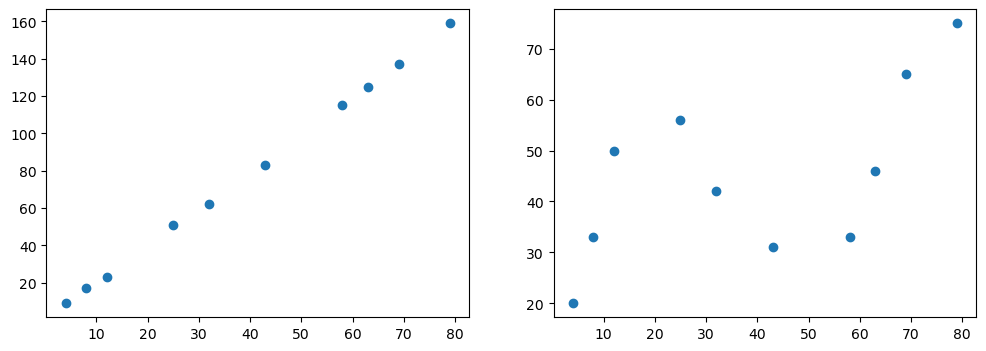

In [2]:
from matplotlib import pyplot as plt

%matplotlib inline

# 两组数据分别绘制子图
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].scatter(x, y1)
axes[1].scatter(x, y2)

In [3]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()  # 线性模型 1
model1.fit(x, y1)

model2 = LinearRegression()  # 线性模型 2
model2.fit(x, y2)

LinearRegression()

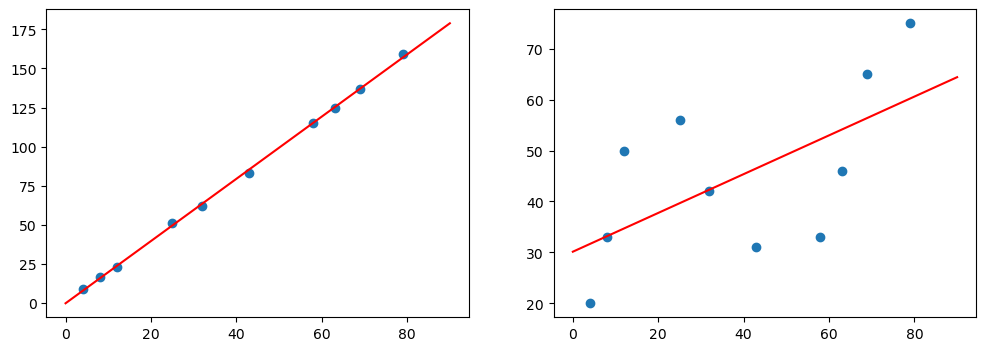

In [4]:
# 绘制拟合直线到原散点图中
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# 模型 1
axes[0].scatter(x, y1)
axes[0].plot(
    [0, 90], [model1.intercept_, model1.coef_[0] * 90 + model1.intercept_], "r"
)
# 模型 2
axes[1].scatter(x, y2)
axes[1].plot(
    [0, 90], [model2.intercept_, model2.coef_[0] * 90 + model2.intercept_], "r"
)

接下来使用scikit-learn库来计算对应的$R^2$结果

In [5]:
from sklearn.metrics import r2_score

# 分别传入真实观测值和模型预测值
r2_score(y1, model1.predict(x)), r2_score(y2, model2.predict(x))

(0.9993315719475073, 0.3740615194558857)

可以看到，模型 1 的 \( R^2 \) 结果趋近于 1，而模型 2 的 \( R^2 \) 的值则小很多。这代表线性回归模型对第一组数据的解释力较强，而对第二组数据解释力不足。实际上，通过肉眼也可以发现，第二组数据其实更适合于多项式回归模型，而非线性回归模型。这也印证了 \( R^2 \) 值的结果。

所以说，虽然采用普通最小二乘估计方法已经能保证模型拟合结果最优，但是依然需要通过「拟合优度检验」来判断该模型是不是能很好地解释数据分布。

这里需要说明的一点，虽然上面说到 \( R^2 \) 的有效取值范围在 \([0, 1]\) 之间。但 scikit-learn 提供的 API 有可能计算出 \( R^2 \) 值为负数的情况。例如下面我们人为设定一条拟合线与样本趋势正好相反，所计算得到的 \( R^2 \) 则为负数。这种情况下，$$TSS = ESS + RSS$$ 的公式也将失去意义。

# 变量显著性检验
变量显著性检验是回归分析中判断解释变量$x$是否是被解释变量$y$的一个显著性的影响因素，其将应用到数理统计学中的假设检验知识。假设检验的原理就是，通过事先对总体参数或总体分布形式作出假设。然后，利用样本信息来判断原假设是否合理。也就是说，通过判断样本信息与原假设是否有显著差异，从而决定是否接受或否定原假设。

我们就直接来看如何使用 Python 完成变量显著性检验，并说明参数代表的含义。这里，我们不再使用 scikit-learn 提供的线性回归算法建模，而是使用数理统计常用库 statsmodels 完成。

In [6]:
import statsmodels.api as sm

x = sm.add_constant(x)  # 添加截距项系数 1
model = sm.OLS(endog=y2, exog=x)  # 普通最小二乘法，endog 因变量，exog 自变量
results = model.fit()
results.params  # 输出拟合后系数

array([30.12973186,  0.38092285])

In [7]:
x

array([[ 1.,  4.],
       [ 1.,  8.],
       [ 1., 12.],
       [ 1., 25.],
       [ 1., 32.],
       [ 1., 43.],
       [ 1., 58.],
       [ 1., 63.],
       [ 1., 69.],
       [ 1., 79.]])

接下来，我们直接可以输出模型的摘要信息，这也是 statsmodels 的一大特色

In [8]:
import warnings

warnings.filterwarnings("ignore")

results.summary2(alpha=0.05)  # 输出模型摘要，95% 置信度

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Ordinary least squares
================================================================
Model:              OLS              Adj. R-squared:     0.296  
Dependent Variable: y                AIC:                83.1646
Date:               2025-03-05 19:49 BIC:                83.7698
No. Observations:   10               Log-Likelihood:     -39.582
Df Model:           1                F-statistic:        4.781  
Df Residuals:       8                Prob (F-statistic): 0.0602 
R-squared:          0.374            Scale:              200.68 
------------------------------------------------------------------
           Coef.    Std.Err.     t      P>|t|     [0.025    0.975]
------------------------------------------------------------------
const     30.1297     8.1820   3.6824   0.0062   11.2620   48.9975
x1         0.3809     0.1742   2.1865   0.0602   -0.0208    0.7827
----------------------------------------------------------------
Omnibus:              2.455        Durbin-Watson:          0.832
Prob(Omnibus):        0.293        Jarque-Bera (JB):       0.895
Skew:                 -0.056       Prob(JB):               0.639
Kurtosis:             1.538        Condition No.:          86   
================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

重点查看第二个表格，依次得到了拟合系数，标准误差，t 值，p 值，以及置信区间。
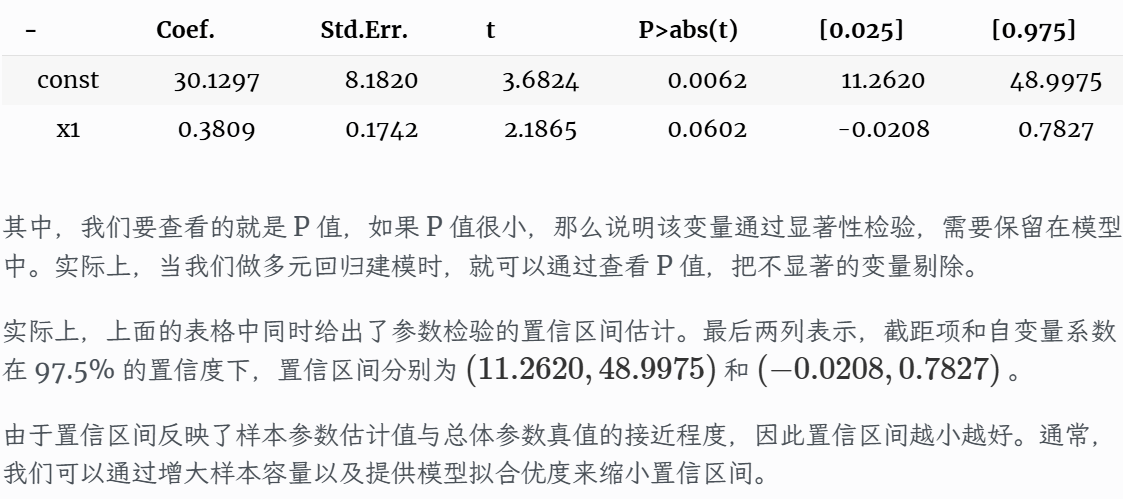

# 注
以下是针对 MAE、MSE、MAPE 的 **生活化类比解释**，用「打靶游戏」场景帮助理解：

---

### **一、场景设定**
假设你是一个射击新手，靶子的中心是 **真实值**（目标值），你的每次射击落点是 **预测值**。现在用三种不同的计分规则（对应三种指标）评价你的射击水平：

---

### **二、指标形象解读**
#### **1. MAE（平均绝对误差）**  
**类比规则**：测量 **每发子弹与靶心的直线距离**（不论偏左还是偏右），计算平均偏离距离。  
**特点**：  
- 只关心「偏离了多远」，不关心方向（正负误差同等看待）  
- 误差单位与原始数据一致（如：厘米、米）  
**例子**：  
- 3次射击偏离距离分别为 2cm、5cm、3cm → MAE = (2+5+3)/3 ≈ **3.33cm**  
**适用场景**：  
快递公司评估「每日送货距离误差」（差1米和差5米对客户体验影响不同） [1] [6]  

---

#### **2. MSE（均方误差）**  
**类比规则**：先将 **每发子弹的偏离距离平方**，再计算平均值。  
**特点**：  
- 平方操作会 **放大较大误差**（如脱靶的子弹会被重点惩罚）  
- 单位变为平方单位（如：平方厘米），需开根号（RMSE）恢复量纲  
**例子**：  
- 同样的3次射击 → MSE = (2²+5²+3²)/3 = (4+25+9)/3 ≈ **12.67 cm²**  
**适用场景**：  
股票价格预测（大幅波动误差比小误差危害更大，需重点控制） [3] [8]  

---

#### **3. MAPE（平均绝对百分比误差）**  
**类比规则**：计算 **偏离距离占靶心距离的百分比**，再取平均值。  
**特点**：  
- 用百分比表示误差，便于 **跨量纲比较**（如比较身高和体重的预测效果）  
- 当靶心距离为0时规则失效（分母不能为零）  
**例子**：  
- 靶心距离为10cm，3次偏离距离为2cm、5cm、3cm → 误差百分比分别为20%、50%、30% → MAPE = (20%+50%+30%)/3 ≈ **33.3%**  
**适用场景**：  
电商预测「商品销量」（如预测误差20%比绝对误差100件更易理解） [3] [9]  

---

### **三、三者的核心区别**
| 指标  | 关注重点           | 误差敏感度 | 单位/量纲      | 缺陷               |
|-------|--------------------|------------|----------------|--------------------|
| MAE   | 平均偏离程度       | 均衡       | 与原数据一致   | 无法突出重大失误   |
| MSE   | 大误差的惩罚力度   | 对异常值高 | 平方单位       | 数值不易直观理解   |
| MAPE  | 相对误差比例       | 均衡       | 百分比（无量纲）| 真实值为零时失效 |

---

### **四、如何选择指标？**
- **想快速理解平均误差** → 选 MAE（如：天气预报温度误差±2℃）  
- **需严控重大失误** → 选 MSE/RMSE（如：桥梁承重预测）  
- **对比不同量纲数据** → 选 MAPE（如：同时预测销售额和用户数）  
- **避免陷阱**：若数据中有零值（如零销量），MAPE不适用 [3] [7]  
